General Description of the Dataset:
              time  android.sensor.accelerometer#mean  \
count  5893.000000                        5893.000000   
mean    117.731716                          10.007976   
std     126.474151                           0.655949   
min       3.000000                           7.369055   
25%      31.000000                           9.737143   
50%      70.000000                           9.850143   
75%     152.000000                          10.078998   
max     682.000000                          17.427391   

       android.sensor.accelerometer#std  \
count                       5893.000000   
mean                           0.982987   
std                            1.505615   
min                            0.001286   
25%                            0.078055   
50%                            0.369163   
75%                            1.058376   
max                           12.879851   

       android.sensor.game_rotation_vector#mean  \
count      

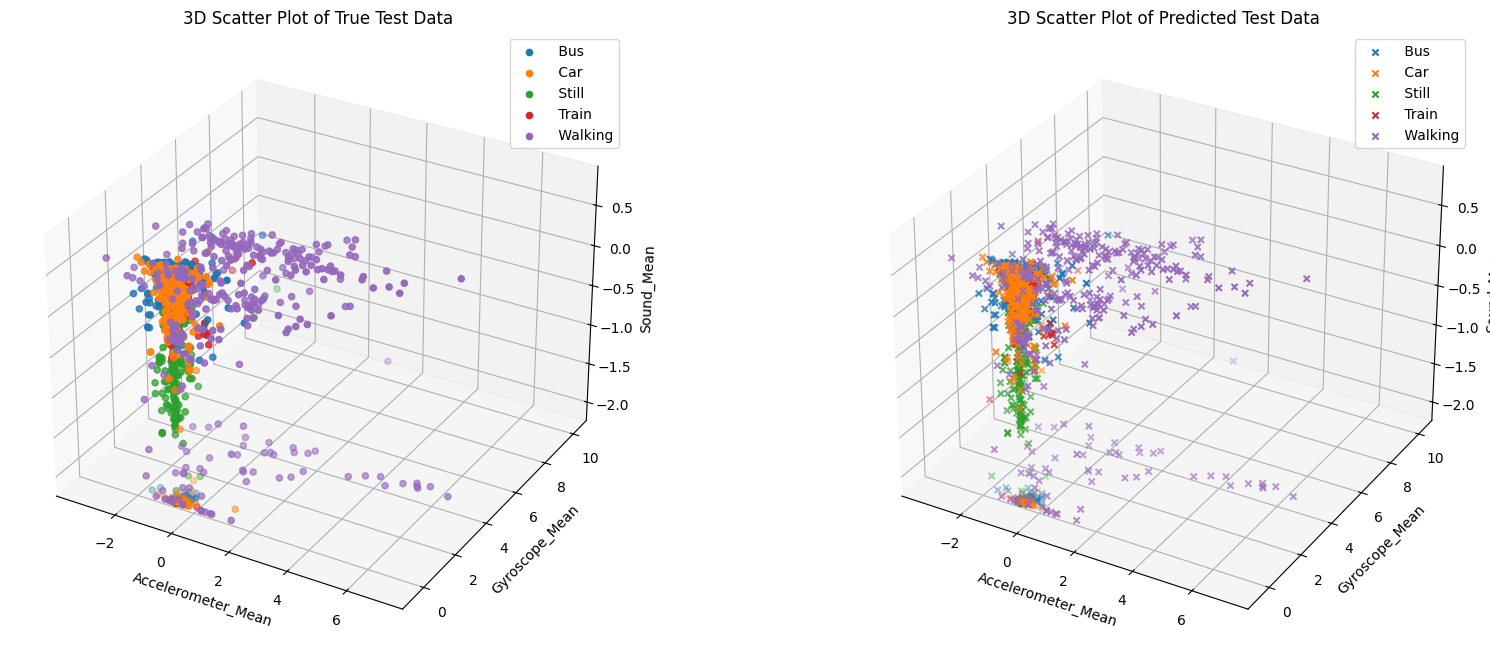

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Load your CSV file (manually enter the file path)
df = pd.read_csv("tmd_data3.csv")

# Remove specified columns
columns_to_remove = ['android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
                     'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max',
                     'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max',
                     'android.sensor.gyroscope_uncalibrated#min', 'android.sensor.gyroscope_uncalibrated#max',
                     'android.sensor.linear_acceleration#min', 'android.sensor.linear_acceleration#max',
                     'android.sensor.orientation#min', 'android.sensor.orientation#max',
                     'android.sensor.rotation_vector#min', 'android.sensor.rotation_vector#max',
                     'sound#min', 'sound#max', 'speed#min', 'speed#max']

df.drop(columns_to_remove, axis=1, inplace=True)

# General Description of the Dataset
print("General Description of the Dataset:")
print(df.describe())

# Class-wise Description of Features
class_names = df['target'].unique()

for class_name in class_names:
    class_df = df[df['target'] == class_name]
    print(f"\nClass: {class_name}")
    print("Description of Features:")
    print(class_df.drop('target', axis=1).describe())

# Count the number of rows for each class in the dataset
class_counts = df['target'].value_counts()

# Print the count for each class
print("Count of rows for each class:")
print(class_counts)

# Splitting features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Selecting specific features for plotting
selected_features = ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#mean', 'sound#mean']
selected_indices = [X.columns.get_loc(feature) for feature in selected_features]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Define the parameter grid including additional parameters and kernel options
param_grid = {
    'C': [1, 10,100], 
    'gamma': [1,0.1,0.01], 
    'kernel': [ 'rbf'],  # Add more kernel options
    
}

# Create a GridSearchCV object with the specified parameters
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=3, cv=5)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Printing the best hyperparameters
print()
print("Best hyperparameters:", grid.best_params_)

# Training the model with best hyperparameters
svm_model = grid.best_estimator_
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)
print()

# Accuracy of training and testing data
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of training data:", train_accuracy)
print("Accuracy of testing data:", test_accuracy)
print()

# Predicting on the test set
Y_pred = svm_model.predict(X_test)

# Evaluating the model
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy*100,"%")
print()

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': '3d'}, gridspec_kw={'width_ratios': [1, 1]})

# Plot true data
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    ax1.scatter(X_test[indices, selected_indices[0]], X_test[indices, selected_indices[1]], X_test[indices, selected_indices[2]], label=f' {label}')

# Plot predicted data
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    ax2.scatter(X_test[indices, selected_indices[0]], X_test[indices, selected_indices[1]], X_test[indices, selected_indices[2]], marker='x', label=f' {label}')

# Plot settings for true data
ax1.set_xlabel('Accelerometer_Mean')
ax1.set_ylabel('Gyroscope_Mean')
ax1.set_zlabel('Sound_Mean')
ax1.legend()
ax1.set_title('3D Scatter Plot of True Test Data')

# Plot settings for predicted data
ax2.set_xlabel('Accelerometer_Mean')
ax2.set_ylabel('Gyroscope_Mean')
ax2.set_zlabel('Sound_Mean')
ax2.legend()
ax2.set_title('3D Scatter Plot of Predicted Test Data')

plt.show()


Fitting whole dataset into the model for cross check : 
Total values: 5893
Matched targets: 5745
Mismatched targets: 148
Matched percentage: 97.49%
Mismatched percentage: 2.51%

Row numbers of mismatched data points:
[47, 95, 102, 109, 132, 157, 198, 290, 295, 296, 308, 334, 372, 393, 416, 535, 582, 583, 643, 720, 751, 800, 808, 812, 842, 861, 1083, 1142, 1224, 1231, 1255, 1297, 1417, 1421, 1451, 1462, 1479, 1488, 1507, 1525, 1535, 1569, 1597, 1614, 1627, 1630, 1652, 1670, 1726, 1770, 1799, 1871, 2053, 2159, 2173, 2273, 2358, 2436, 2463, 2525, 2545, 2548, 2559, 2564, 2676, 2802, 2835, 2863, 2903, 2924, 2927, 2942, 2944, 3067, 3227, 3275, 3309, 3311, 3318, 3332, 3357, 3363, 3426, 3429, 3489, 3552, 3585, 3610, 3631, 3666, 3714, 3719, 3813, 3821, 3892, 3958, 3973, 3988, 4006, 4017, 4058, 4086, 4154, 4236, 4319, 4323, 4343, 4401, 4428, 4454, 4466, 4476, 4480, 4521, 4530, 4537, 4550, 4722, 4728, 4799, 4803, 4894, 4985, 5020, 5045, 5053, 5155, 5184, 5203, 5227, 5235, 5317, 5327, 5372, 5403, 

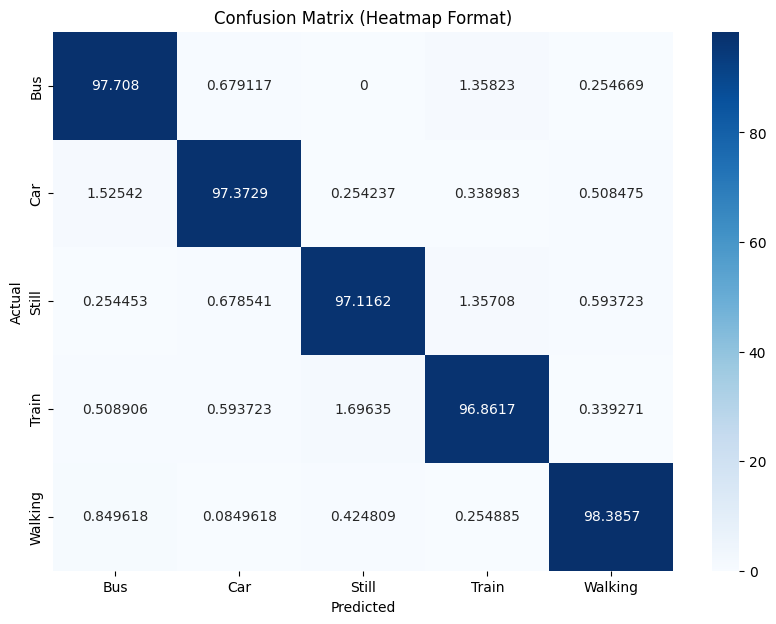

In [31]:
y_pred222 = svm_model.predict(X_scaled)

# Count the total number of values in each column
total_values = len(df)
total_matched = sum(df['target'] == y_pred222)
total_mismatched = total_values - total_matched

# Calculate the percentages
matched_percentage = (total_matched / total_values) * 100
mismatched_percentage = (total_mismatched / total_values) * 100

# Print the results
print("Fitting whole dataset into the model for cross check : ")
print(f"Total values: {total_values}")
print(f"Matched targets: {total_matched}")
print(f"Mismatched targets: {total_mismatched}")
print(f"Matched percentage: {matched_percentage:.2f}%")
print(f"Mismatched percentage: {mismatched_percentage:.2f}%")
print()

# Find the indices of mismatched data points
mismatched_indices = np.where(y != y_pred222)[0]

# Extract the row numbers of the mismatched data points
mismatched_row_numbers = df.iloc[mismatched_indices].index.tolist()

# Print the row numbers of the mismatched data points
print("Row numbers of mismatched data points:")
print(mismatched_row_numbers)

# Make predictions on the whole dataset
Y_pred_all = svm_model.predict(X_scaled)

# Generate confusion matrix
conf_matrix = confusion_matrix(y, Y_pred_all)

# Normalize confusion matrix and convert to percentages
conf_matrix_norm_percent = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

# Create a DataFrame for normalized confusion matrix in percentage format
conf_df_norm_percent = pd.DataFrame(conf_matrix_norm_percent, index=np.unique(y), columns=np.unique(y))

# Print confusion matrix in table format with percentages
print()
print("Confusion Matrix (Table Format - Normalized, Percentages out of 100):")
print(tabulate(conf_df_norm_percent, headers='keys', tablefmt='grid', floatfmt=".2f"))
print()

# Plot confusion matrix in table format
conf_df = pd.DataFrame(conf_matrix_norm_percent, index=np.unique(y), columns=np.unique(y))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix (Heatmap Format)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [38]:
# Take input as a single string with space-separated double elements
input_string = input("Enter the list of 19 double elements separated by spaces: ")
print()

# Split the input string by spaces and convert each substring to a float
input_list = [float(x) for x in input_string.split()]

print("Input list:", input_list)


Enter the list of 19 double elements separated by spaces:  61	10.60852227	1.1235301	0.927711235	0.001133038	0.250495732	0.225013073	0.145245874	0.017222665	1.653804343	0.894604022	332.6198314	2.699342244	0.362048387	0.005195332	89.74997857	0.004597568	1.75	0



Input list: [61.0, 10.60852227, 1.1235301, 0.927711235, 0.001133038, 0.250495732, 0.225013073, 0.145245874, 0.017222665, 1.653804343, 0.894604022, 332.6198314, 2.699342244, 0.362048387, 0.005195332, 89.74997857, 0.004597568, 1.75, 0.0]


In [39]:
# Convert the input features to a DataFrame
input_df = pd.DataFrame([input_list], columns=X.columns)

# Scale the input features
input_scaled = scaler.transform(input_df)

# Predict the target probabilities
predicted_probabilities = svm_model.predict_proba(input_scaled)

# Get the predicted target class
predicted_target = svm_model.predict(input_scaled)

# Print the predicted probabilities for each class
print("Predicted probabilities for each class:", predicted_probabilities)           
print()

# Calculate and print the percentage for each target
for i, target in enumerate(svm_model.classes_):
    percent = predicted_probabilities[0][i] * 100
    print(f"Predicted percentage for class {target}: {percent:.10f}%")

# Print the predicted target class
print()
print("Predicted target:", predicted_target)
print()


Predicted probabilities for each class: [[8.53934058e-01 2.59875319e-02 6.69481951e-04 1.04090725e-02
  1.08999856e-01]]

Predicted percentage for class Bus: 85.3934058123%
Predicted percentage for class Car: 2.5987531897%
Predicted percentage for class Still: 0.0669481951%
Predicted percentage for class Train: 1.0409072458%
Predicted percentage for class Walking: 10.8999855570%

Predicted target: ['Bus']



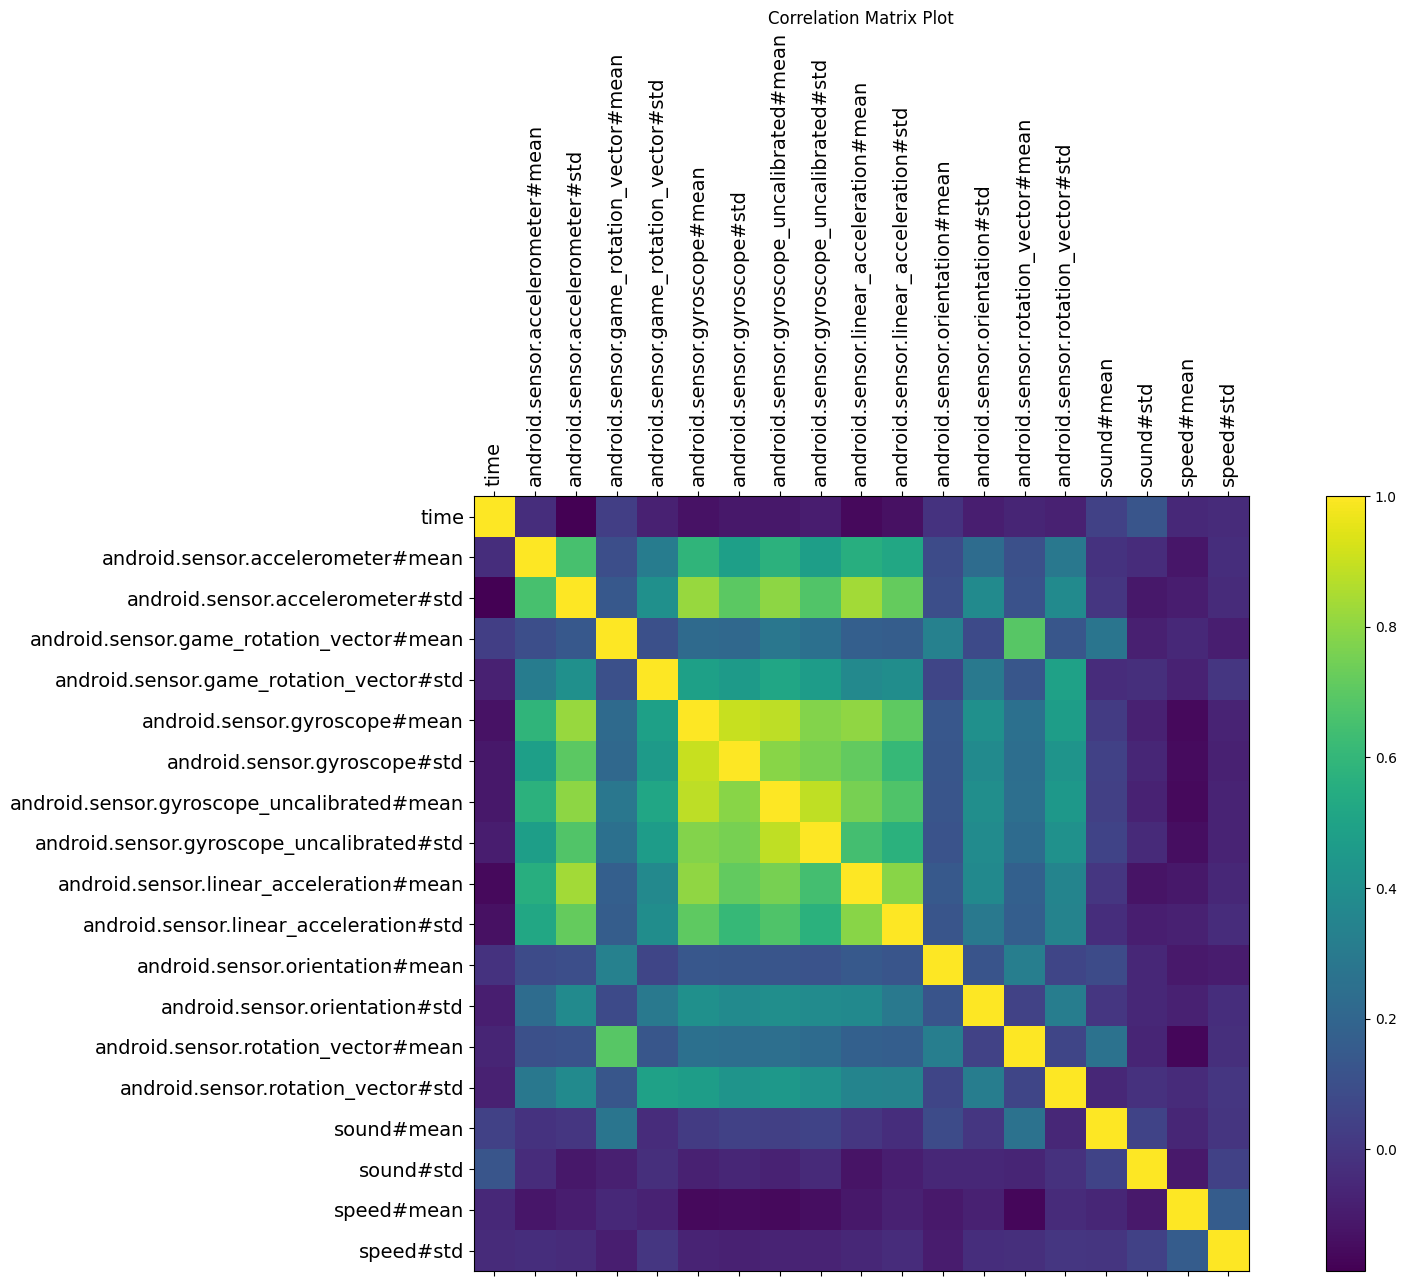

In [19]:
# Generate correlation matrix plot
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
plt.figure(figsize=(20, 10))
plt.matshow(numeric_df.corr(), fignum=1)
plt.yticks(np.arange(numeric_df.shape[1]), numeric_df.columns, fontsize=14)
plt.xticks(np.arange(numeric_df.shape[1]), numeric_df.columns, rotation='vertical', fontsize=14)
plt.colorbar()
plt.title('Correlation Matrix Plot')
plt.show()
